# Movie Industry Analysis

Authors: Cayke Felipe dos Anjos, Dolgor Purbueva

## Overview

This project analyzes past movies data to offer strategic business recommendations for a new film studio. We aim to predict the most profitable strategies for film production and release by examining production budgets, gross revenues, net profits, genres, popularity, key staff and release timelines. As result this project provides three business recommendations: what genre should a future movie be, what budget to allocate and when to release it.

## Business Problem

The company is expanding its portfolio by investing in a new film studio. Launching a film studio in today's competitive entertainment industry requires a solid understanding of what drives movie success and attracts audiences. The movie industry is known for its substantial risks and high capital demands. Recent developments in AI have made video content creation faster and more efficient, increasing competition but also opening up new opportunities to enter the market.

Our project aims to analyze various datasets, including past movies' financial results, genre correlations, and movie ratings and popularity. By using data analysis techniques, we seek to gain valuable insights and identify patterns that can help shape the company's film production strategy. The goal is to provide three concrete business recommendations that maximize profitability and lower business risks, ensuring a strong entry into the market.

Some of the questions we tried to answer with analysis:

* How should the movie be budgeted?
* What genres are most profitable?
* Whats genres are most popular?
* When should a movie be released?

## Data Understanding

We used datasets from Rotten Tomatoes, TheMovieDB, Bom Office Mojo, IMDB and The Numbers. Each dataset is of different size and contains different data. For budget related analysis we used IMDB and The Numbers. TheMovieDD dataset was used to explore movie ratings and popularity. IMDB was also used to determine most popular directors for each genre.

* One of the main metrics we explored is genre. [IMDB defines](https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG?ref_=helpms_h#) genre as a category of artistic composition, characterized by similarities in form, style, or subject matter for a piece of content. [Reaserch by Mustafa Mahmoud Yousry](https://offscreen.com/view/going_to_the_movies) has shown that genre is the main decision factor for audience when chosing a movie to watch.

<img src="genre.png" alt="Alt text" width="400"/>

* We introduced the Return on Investment (ROI) metric as a standardized criterion to measure the financial success of a movie relative to its investments, as well as calculated movie net profit.

* We also explored [popularity criteria in TheMovieDB dataset](https://developer.themoviedb.org/docs/popularity-and-trending), as well as average vote (rating).


<img src="screen1.png" alt="Alt text" width="800"/>

<img src="movie_data_erd.jpeg" alt="Alt text" width="400"/>

## Data Analysis

In [1216]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [1217]:
#function for cleaning columns and coverting to integer

def clean_and_convert_to_int(column):
    return column.replace({'\$': '', ',': ''}, regex=True).astype(int)

#function for converting to date type

def convert_to_date(column):
    return pd.to_datetime(column, errors='coerce')

#function to clean object columns

def clean_object(column):
    return column.strip().lower()

def split(column):
    return column.str.split(',')

### The Numbers DF - Gross and ROI

5782 rows with no Null values

convert all money columns into integer
convert release date to date type

i noticed that ID column is not a unique values, all ID numbers repeat 58 or 57 times. the system doesnt make sense, so we delete id column

we calculate ROI in a new column. 
some of the budget and gross values had 0 values. so we drop them using ROI column and lose 367 rows

**Result: 3611 rows × 6 columns. Movies with positive ROI**

In [1218]:
#cleaning The Numbers DF

tn = pd.read_csv('zippedData/tn.movie_budgets.csv')

tn[['production_budget', 'domestic_gross', 'worldwide_gross']] = tn[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(clean_and_convert)

tn[['release_date']] = tn[['release_date']].apply(convert_to_date)

tn['release_year'] = tn['release_date'].dt.year

tn = tn.drop(columns=['id'])

tn['worldwide_net'] = tn['worldwide_gross'] - tn['production_budget']

tn['ROI'] = (tn['worldwide_net']) / tn['production_budget'] * 100

tn = tn[(tn['domestic_gross'] != 0) & (tn['worldwide_gross'] != 0)]

tn = tn[(tn['ROI'] != 0) & (tn['ROI'] != np.inf) & (tn['ROI'] != -np.inf) & (tn['ROI'] != -100)]

tn = tn.sort_values(by='ROI')

#tn = tn[tn['ROI'] > 0 ]

tn

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,worldwide_net,ROI
4081,2010-05-21,Perrierâs Bounty,6600000,828,828,2010,-6599172,-99.987455
3818,2015-05-08,Skin Trade,9000000,1242,1242,2015,-8998758,-99.986200
2152,1997-08-24,The Grimm Brothers' Snow White,26000000,5000,5000,1997,-25995000,-99.980769
5027,1993-01-01,Ed and his Dead Mother,1800000,673,673,1993,-1799327,-99.962611
1242,2013-11-01,Mr. Nobody,46500000,3622,22254,2013,-46477746,-99.952142
...,...,...,...,...,...,...,...,...
5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,1999,247700000,41283.333333
5679,2015-07-10,The Gallows,100000,22764410,41656474,2015,41556474,41556.474000
5492,2009-09-25,Paranormal Activity,450000,107918810,194183034,2009,193733034,43051.785333
5613,1980-03-21,Mad Max,200000,8750000,99750000,1980,99550000,49775.000000


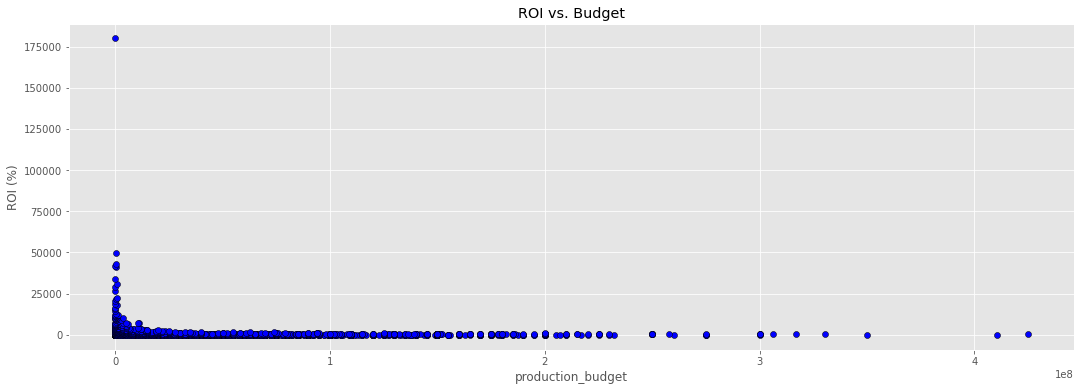

In [1219]:
plt.figure(figsize=(18, 6))
plt.scatter(tn['production_budget'], tn['ROI'], color='blue', edgecolors='black')
plt.title('ROI vs. Budget')
plt.xlabel('production_budget')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.show()

In [1220]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv')

In [1221]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')


In [1222]:
rt_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


### IMDB DB

We decided to take region, language and genre info from IMDB db

first we filter by language = en

when trying to filter by region, we see that majority has XWW region (around 18k). so this filtering is irrelevant

I see a lot of confusion between three title columns - primary_title, original_title, title. we stick with primary title

we drop all unnecessary columns and group rows by movie id to avoid duplicates

In [1223]:
conn = sqlite3.connect('zippedData/im.db')

df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df[df['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [1224]:
conn = sqlite3.connect('zippedData/im.db')

imdb = pd.read_sql(
    """
    SELECT  primary_title AS movie, 
            start_year, 
            runtime_minutes, 
            genres
    FROM movie_basics
    GROUP BY movie_id
    
    """
, conn
)

# imdb = pd.read_sql(
#     """
#     SELECT  mb.primary_title AS movie, 
#             mb.start_year, 
#             mb.runtime_minutes, 
#             mb.genres, 
#             per.primary_name AS director
#     FROM movie_basics AS mb
#     JOIN movie_akas AS ma
#     USING(movie_id)
#     JOIN directors AS dir
#     USING(movie_id)
#     JOIN persons AS per
#     USING(person_id)
#     WHERE language = 'en'
#     GROUP BY movie_id
    
#     """
# , conn
# )


In [1225]:
imdb

,movie,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,None


### Merged IMDB and TN

In [1226]:
merged_df = pd.merge(tn, imdb, on='movie', how='inner')
merged_df.sort_values(by='ROI', ascending=False).reset_index(drop=True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,worldwide_net,ROI,start_year,runtime_minutes,genres
0,2015-07-10,The Gallows,100000,22764410,41656474,2015,41556474,41556.474000,2015,81.0,"Horror,Mystery,Thriller"
1,1942-08-13,Bambi,858000,102797000,268000000,1942,267142000,31135.431235,2013,58.0,"Biography,Documentary"
2,1968-10-01,Night of the Living Dead,114000,12087064,30087064,1968,29973064,26292.161404,2014,79.0,Horror
3,1976-11-21,Rocky,1000000,117235147,225000000,1976,224000000,22400.000000,2019,NaN,"Action,Drama,Romance"
4,1976-11-21,Rocky,1000000,117235147,225000000,1976,224000000,22400.000000,2013,136.0,"Action,Comedy,Drama"
...,...,...,...,...,...,...,...,...,...,...,...
3272,1999-10-22,Molly,21000000,17396,17396,1999,-20982604,-99.917162,2020,NaN,Drama
3273,1999-10-22,Molly,21000000,17396,17396,1999,-20982604,-99.917162,2017,91.0,"Action,Sci-Fi"
3274,1999-10-22,Molly,21000000,17396,17396,1999,-20982604,-99.917162,2017,128.0,"Biography,Documentary,Family"
3275,2015-05-08,Skin Trade,9000000,1242,1242,2015,-8998758,-99.986200,2014,96.0,"Action,Crime,Thriller"


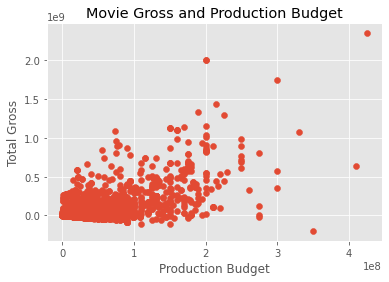

In [1227]:
fig, ax = plt.subplots()

ax.set_title('Movie Gross and Production Budget')
ax.set_ylabel('Total Gross')
ax.set_xlabel('Production Budget')

y1 = merged_df.worldwide_net
x1 = merged_df.production_budget

plt.scatter(x1,y1);

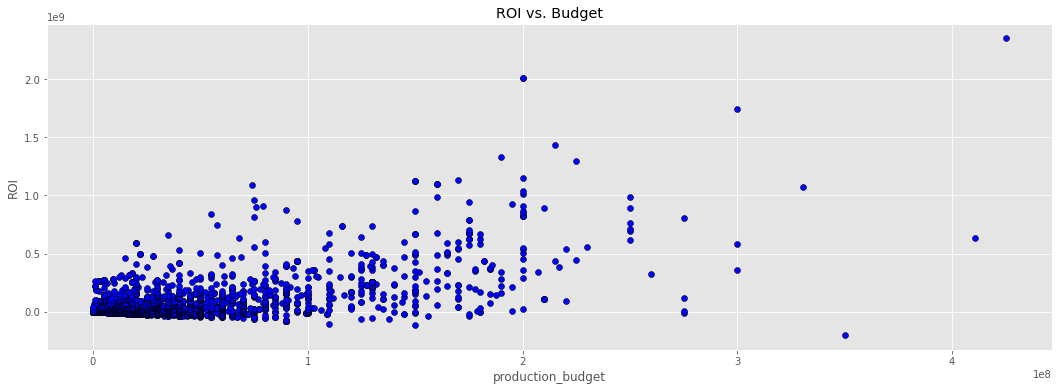

In [1228]:
plt.figure(figsize=(18, 6))
plt.scatter(merged_df['production_budget'], merged_df['worldwide_net'], color='blue', edgecolors='black')
plt.title('ROI vs. Budget')
plt.xlabel('production_budget')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

In [1229]:
# Correlation between Gross and Budget

column_1 = merged_df["worldwide_net"]
column_2 = merged_df["production_budget"]

correlation = column_1.corr(column_2)
print(f'Correlation between Net Profit and Budget is {correlation.round(2)}')

Correlation between Net Profit and Budget is 0.63


Text(0.5, 1.0, 'Linear Regression of Production Budget Compared to Net Profit')

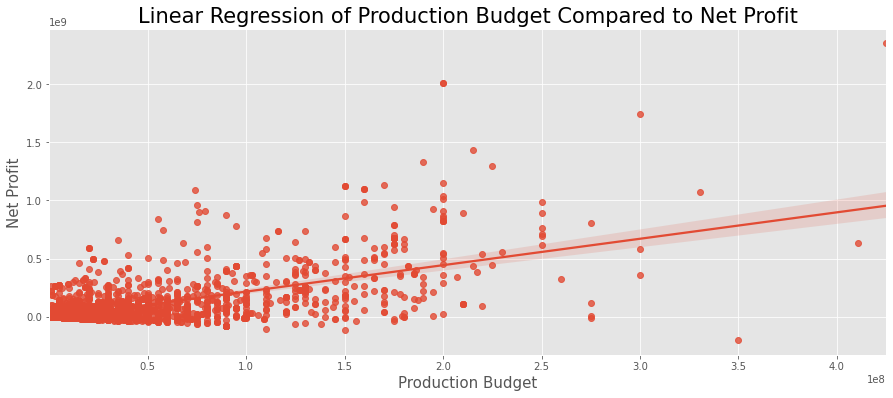

In [1230]:
fig, ax = plt.subplots(figsize=(15,6))
sns.regplot(data=merged_df, x="production_budget", y="worldwide_net")
ax.set_ylabel('Net Profit', fontsize=15)
ax.set_xlabel('Production Budget', fontsize=15)
ax.set_title('Linear Regression of Production Budget Compared to Net Profit', fontsize = 21)

In [1231]:
merged_df['genres'] = merged_df['genres'].str.split(',')
merged_df_exploded = merged_df.explode('genres')
merged_df_exploded['genres'].value_counts()

Drama          1585
Comedy          741
Action          622
Thriller        492
Adventure       439
Documentary     422
Crime           340
Romance         322
Horror          321
Biography       225
Mystery         211
Sci-Fi          198
Fantasy         184
Family          178
Animation       134
History          86
Music            77
Sport            69
War              47
Musical          31
Western          21
News              7
Name: genres, dtype: int64

In [1232]:
median = merged_df_exploded.groupby('genres')['ROI'].median().reset_index()
median

,genres,ROI
0,Action,109.847075
1,Adventure,161.124261
2,Animation,199.854564
3,Biography,74.016666
4,Comedy,119.199703
5,Crime,53.753771
6,Documentary,55.890618
7,Drama,61.102523
8,Family,116.706643
9,Fantasy,126.830094


In [1233]:
median = median.sort_values(by='ROI', ascending=False).reset_index(drop=True)
median

,genres,ROI
0,Musical,323.950800
1,Animation,199.854564
2,Horror,162.551316
3,Adventure,161.124261
4,Mystery,147.566740
5,Sci-Fi,145.944250
6,Music,128.700183
7,Fantasy,126.830094
8,Comedy,119.199703
9,Family,116.706643


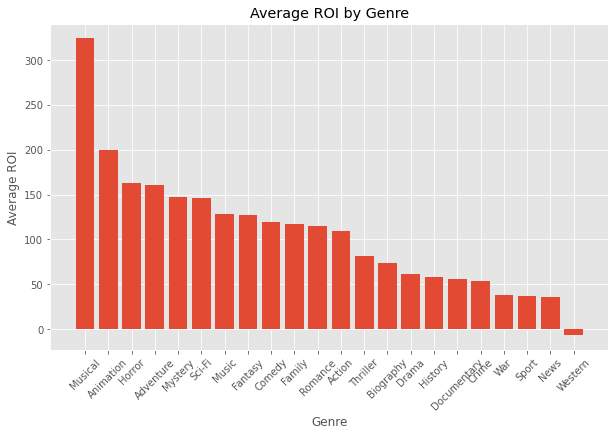

In [1234]:
plt.figure(figsize=(10, 6))
plt.bar(median['genres'], median['ROI'])
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.xticks(rotation=45)
plt.show()

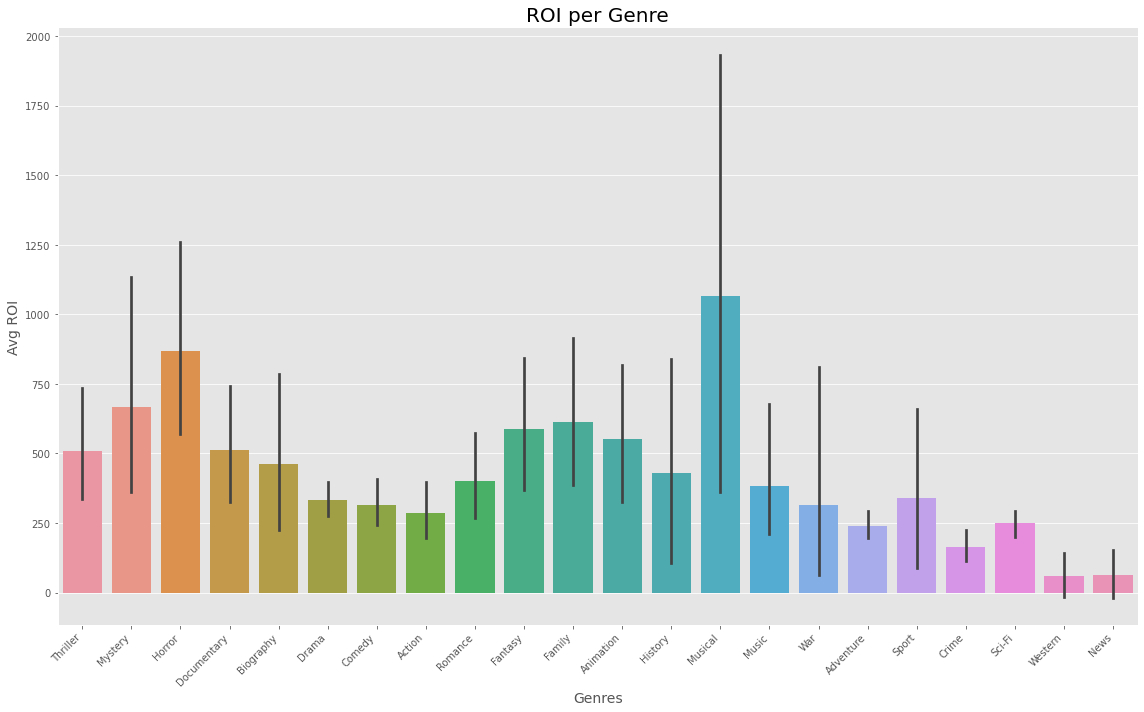

In [1235]:
merged_df_exploded = merged_df_exploded.sort_values(by='ROI', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = 'genres', y = 'ROI', data = merged_df_exploded,  ax = ax)
ax.set_title('ROI per Genre', fontsize=20)
ax.set_ylabel('Avg ROI', fontsize=14)
ax.set_xlabel('Genres', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()
plt.show()

# Popularity and Ratings by Genre

To answer next question we need to analyse TheMovieDB data set. It has 10 columns and 26517 rows. Our focus are movie title, genre, vote_average, popularity and release date.

In [1236]:
movie_db = pd.read_csv('zippedData/tmdb.movies.csv')
movie_db.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


We import dataset into pandas df and clean it. 

We see that genre columns contains string value with genre id numbers in square brackets. In order to decode genre ids into genre names, we used [dictionary from TheMovieDB](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee).

In [1237]:
# Clean string value
movie_db['genre_ids'] = movie_db['genre_ids'].replace({'\[': '', '\]': ''}, regex=True)

# Split the string into a list of string
movie_db['genre_ids'] = movie_db['genre_ids'].str.split(',')

# Use explode method to separate each genre id into a separate row
movie_db = movie_db.explode('genre_ids')

# Use presaved clean_object function to clean resulted string as some of them have spaces infront
movie_db['genre_ids'] = movie_db['genre_ids'].apply(clean_object)

In [1238]:
genre_dict = {
    '28': 'Action',
    '12': 'Adventure',
    '16': 'Animation',
    '35': 'Comedy',
    '80': 'Crime',
    '99': 'Documentary',
    '18': 'Drama',
    '10751': 'Family',
    '14': 'Fantasy',
    '36': 'History',
    '27': 'Horror',
    '10402': 'Music',
    '9648': 'Mystery',
    '10749': 'Romance',
    '878': 'Science Fiction',
    '10770': 'TV Movie',
    '53': 'Thriller',
    '10752': 'War',
    '37': 'Western'
}

In [1239]:
# decode genre id column into genre names using map function
movie_db['genre_ids'] = movie_db['genre_ids'].map(genre_dict)

As a result we have a dataframe with genre names for each movie that use for analysis

In [1240]:
movie_db.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [1241]:
# do more cleaning dropping Nan values in genre column
movie_db_cleaned = movie_db.dropna(subset=['genre_ids'])

# drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'original_title', ]
movie_db_cleaned = movie_db_cleaned.drop(columns=columns_to_drop)

# extracting release month into a separate column
movie_db_cleaned[['release_date']] = movie_db_cleaned[['release_date']].apply(convert_to_date)
movie_db_cleaned['release_month'] = movie_db_cleaned['release_date'].dt.month

# give columns more convinient names
movie_db_cleaned.columns = ['genres', 'id', 'language', 'popularity', 'release_date', 'movie', 'vote_average', 'vote_counts', 'release_month']

In [1242]:
movie_db_cleaned['genres'].value_counts()

Drama              8303
Comedy             5652
Documentary        4965
Thriller           4207
Horror             3683
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1515
Animation          1486
Adventure          1400
Music              1267
Mystery            1237
Fantasy            1139
TV Movie           1084
History             622
War                 330
Western             205
Name: genres, dtype: int64

As a result we have a dataframe with 45355 rows × 9 columns

In [1243]:
movie_db_cleaned

,genres,id,language,popularity,release_date,movie,vote_average,vote_counts,release_month
0,Adventure,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
0,Fantasy,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
0,Family,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,Fantasy,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3
1,Adventure,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3
...,...,...,...,...,...,...,...,...,...
26515,Family,366854,en,0.600,2018-06-22,Trailer Made,0.0,1,6
26515,Adventure,366854,en,0.600,2018-06-22,Trailer Made,0.0,1,6
26515,Action,366854,en,0.600,2018-06-22,Trailer Made,0.0,1,6
26516,Thriller,309885,en,0.600,2018-10-05,The Church,0.0,1,10


As a next step we look at the vote_average column that has an average viewer rating for each movie. We use this column to analyze average rating for each genre separately.

In [1244]:
# saving grouped by genre df into a new variable with a mean rating per genre calculated
mean_rate_genre = movie_db_cleaned.groupby('genres')['vote_average'].mean().reset_index()

# sorting by average rating
mean_rate_genre = mean_rate_genre.sort_values(by='vote_average')

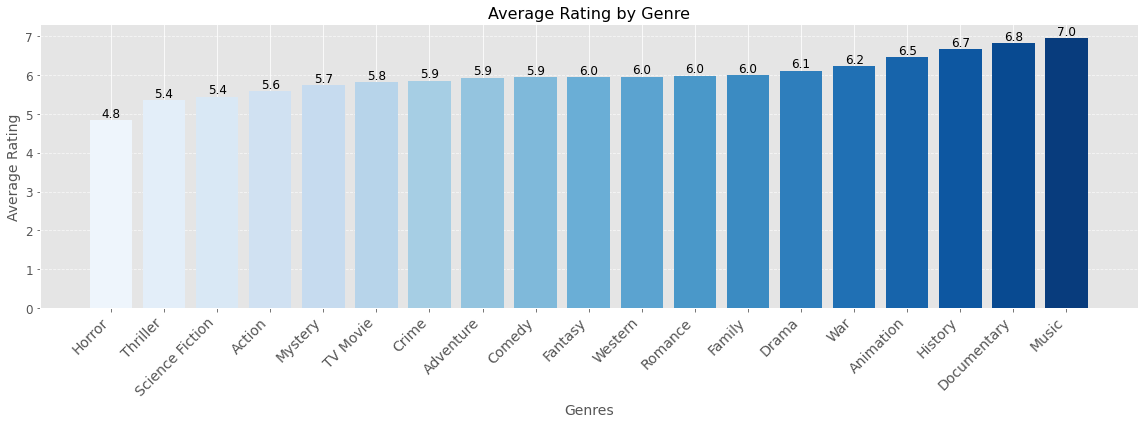

In [1245]:
# Create a color palette
palette = sns.color_palette("Blues", len(mean_rate_genre))

plt.figure(figsize=(16, 6))
bars = plt.bar(mean_rate_genre['genres'], mean_rate_genre['vote_average'], color=palette)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating by Genre', fontsize=16)

# Rotate x-ticks 
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In a next step we use popularity index. Popularity is a metric used by TheMovieDB to rank movies: "You can think of popularity as being a "lifetime" popularity score that is impacted by the attributes below."

Attributes used to calculate popularity for movie category by TheMovieDB: number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, number of users who added it to their "watchlist" for the day, release date, number of total votes, previous days score.

As we can see it's a complex metric that takes into account several criteria and as a result gives populairty score from 0 to 100. We rely on TheMovieDB popularity scoring because it's one of the biggest movie databases that was built with a community effort starting from 2008 with around a millions movies scored.

In [1272]:
# saving grouped by genre df into a new variable with a mean popularity score per genre calculated

mean_pop_genre = movie_db_cleaned.groupby('genres')['popularity'].mean().reset_index()
mean_pop_genre = mean_pop_genre.sort_values(by='popularity')

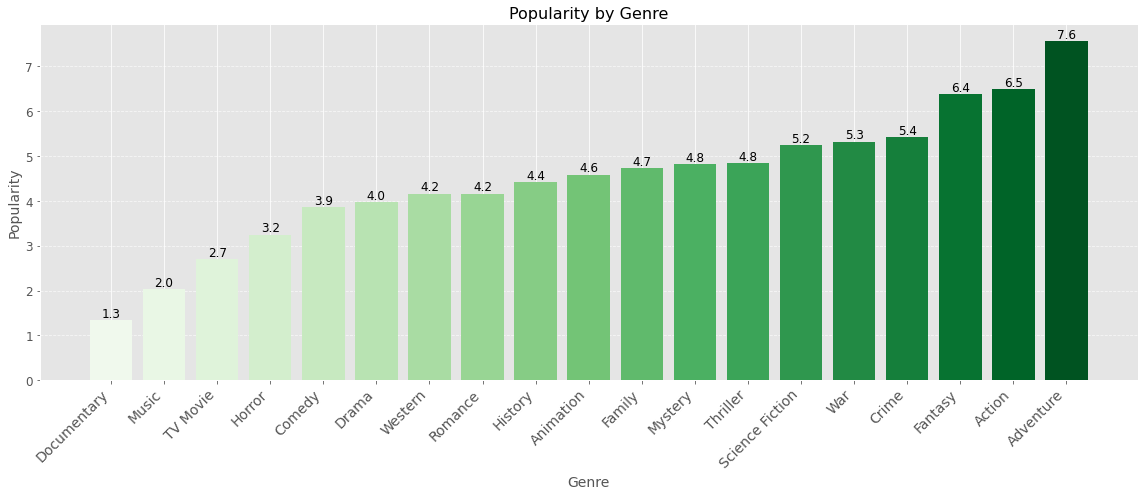

In [1247]:
palette = sns.color_palette("Greens", len(median_pop))

plt.figure(figsize=(16, 7))
bars = plt.bar(mean_pop_genre['genres'], mean_pop_genre['popularity'], color=palette)

# Add labels and title
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity by Genre', fontsize=16)

# Rotate x-ticks
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

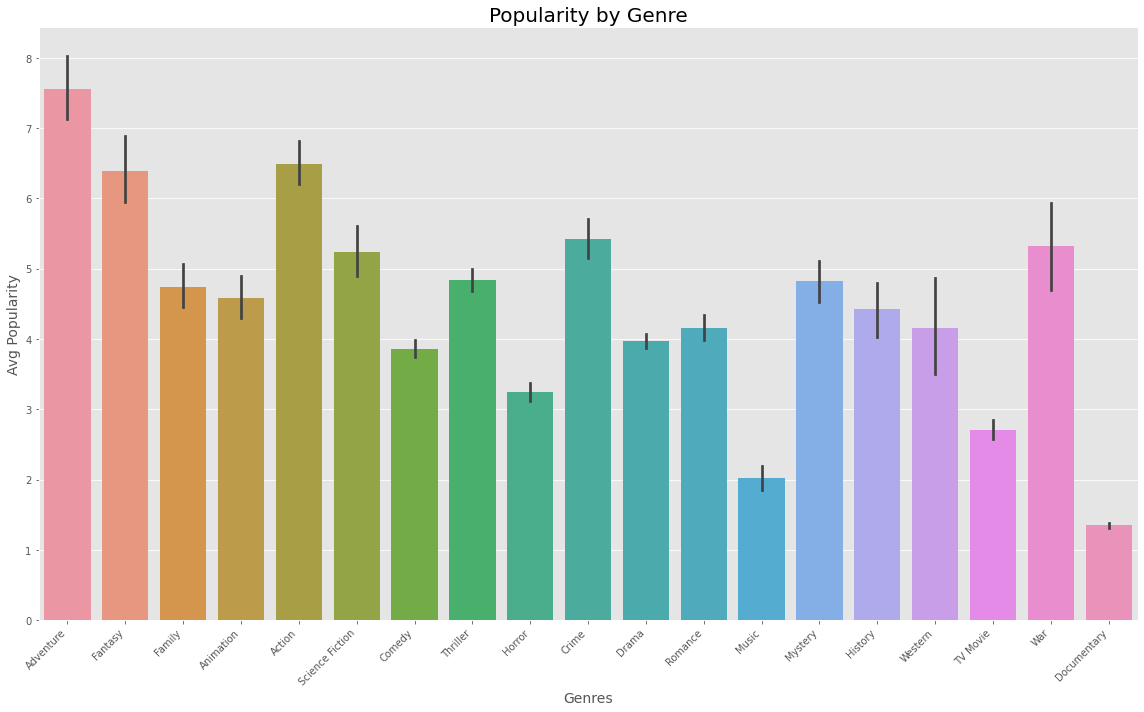

In [1270]:
fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = 'genres', y = 'popularity', data = movie_db_cleaned,  ax = ax)
ax.set_title('Popularity by Genre', fontsize=20)
ax.set_ylabel('Avg Popularity', fontsize=14)
ax.set_xlabel('Genres', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()
plt.show()

In [1248]:
df_genre = pd.merge(mean_rate_genre, mean_pop_genre, on='genres', how='inner')
df_genre = df_genre.sort_values(by='popularity')

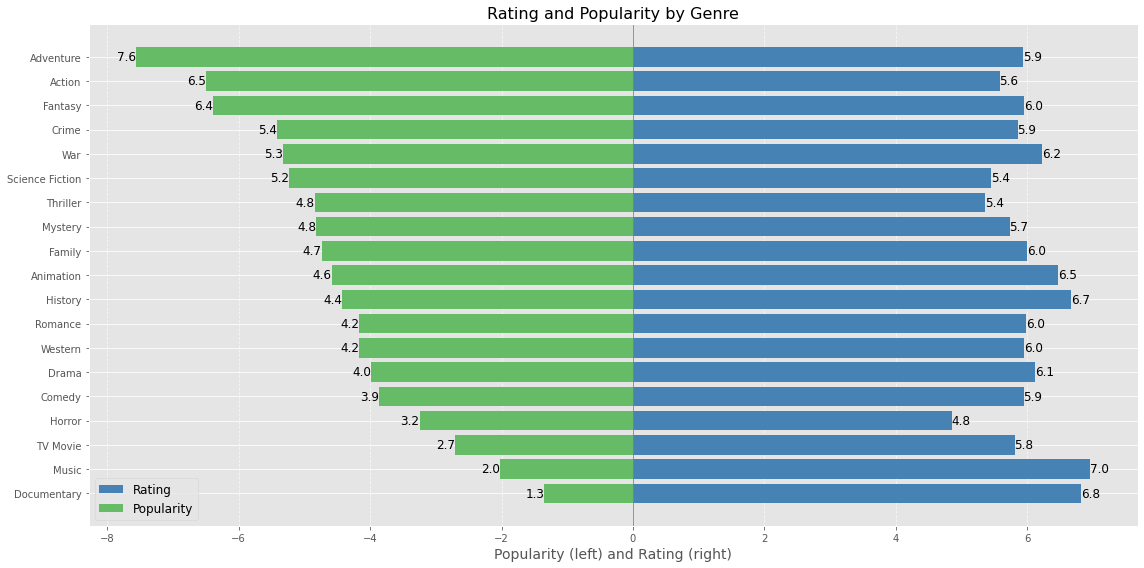

In [1322]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plotting ratings
bars_rating = ax.barh(df_genre['genres'], df_genre['vote_average'], color='#4682B4', label='Rating')

# Plotting popularity 
bars_popularity = ax.barh(df_genre['genres'], -df_genre['popularity'], color='#66BB66', label='Popularity')

# Adding a vertical line at x=0
plt.axvline(x=0, color='gray', linewidth=0.8)

# Adding labels and title
plt.xlabel('Popularity (left) and Rating (right)', fontsize=14)
plt.title('Rating and Popularity by Genre', fontsize=16)

plt.legend(loc='lower left', fontsize=12)

# Adding grid lines for better readability
ax.grid(which='major', axis='x', linestyle='--', alpha=0.7)

# Adding value for ratings
for bar in bars_rating:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', ha='left', va='center', fontsize=12, color='black')

# Adding value for popularity
for bar in bars_popularity:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{-width:.1f}', ha='right', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


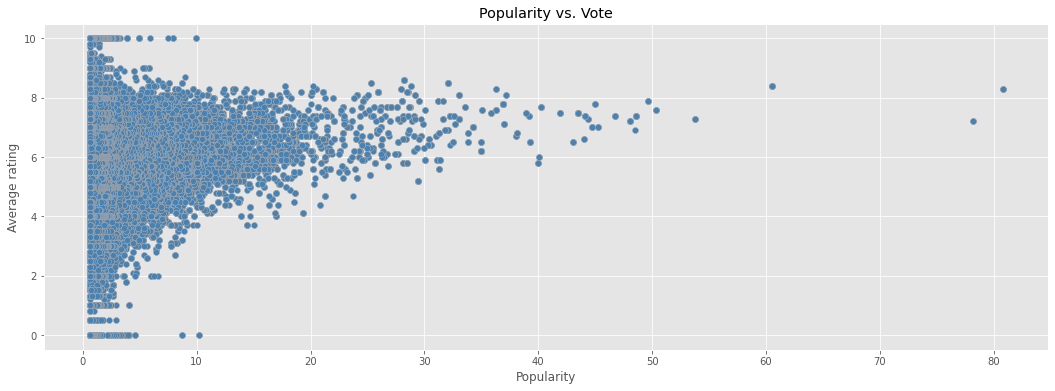

In [1266]:
plt.figure(figsize=(18, 6))
plt.scatter(movie_db_cleaned['popularity'], movie_db_cleaned['vote_average'], color='#4682B4', edgecolors='darkgrey')
plt.title('Popularity vs. Vote')
plt.xlabel('Popularity')
plt.ylabel('Average rating')
plt.grid(True)
plt.show()

## Best time to release 

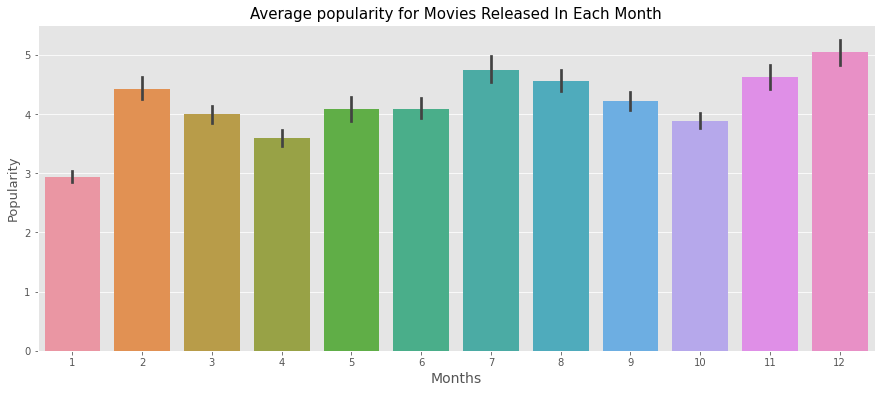

In [1275]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=movie_db_cleaned, x= 'release_month', y='popularity')
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Movies Released In Each Month', fontsize=15);

# Top Popular Genres - Adventure, Action, Fantasy - Release months

In [1280]:
adventure = movie_db_cleaned[movie_db_cleaned['genres'] ==  'Adventure']
action = movie_db_cleaned[movie_db_cleaned['genres'] ==  'Action']
fantasy = movie_db_cleaned[movie_db_cleaned['genres'] ==  'Fantasy']

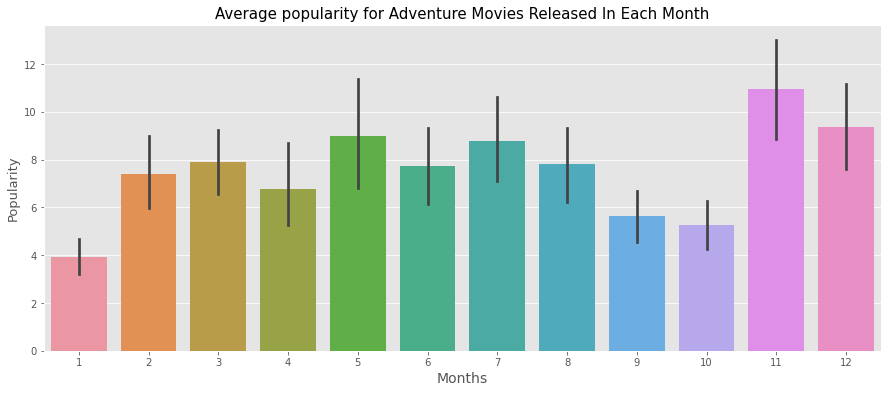

In [1282]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=adventure, x= 'release_month', y='popularity')
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Adventure Movies Released In Each Month', fontsize=15);

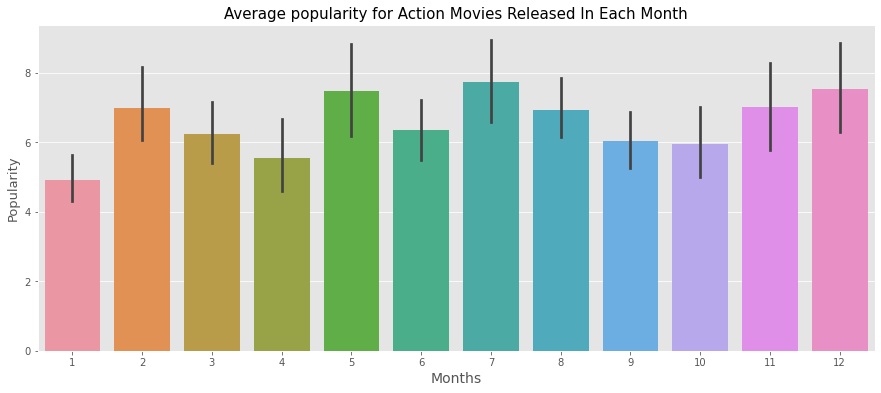

In [1283]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=action, x= 'release_month', y='popularity')
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Action Movies Released In Each Month', fontsize=15);

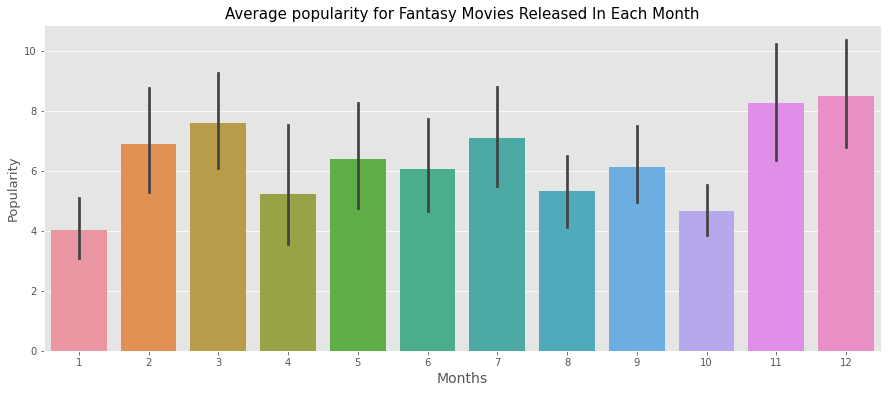

In [1284]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=fantasy, x= 'release_month', y='popularity')
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Fantasy Movies Released In Each Month', fontsize=15);

# Top Popular Genres - Adventure, Action, Fantasy - Directors

In [1256]:
conn = sqlite3.connect('zippedData/im.db')

imdb_dir = pd.read_sql(
    """
    SELECT  mb.primary_title AS movie, 
            mb.start_year, 
            mb.runtime_minutes, 
            mb.genres,
            d.person_id,
            p.primary_name
    FROM movie_basics AS mb
    JOIN directors AS d
    USING(movie_id)
    JOIN persons AS p
    USING(person_id)
    GROUP BY movie_id
    
    """
, conn
)


In [1257]:
imdb_dir

,movie,start_year,runtime_minutes,genres,person_id,primary_name
0,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul
2,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,Hrishikesh Mukherjee
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,Raoul Ruiz
...,...,...,...,...,...,...
140411,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,Azhar Kinoi Lubis
140412,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,nm9272490,Angela Gurgel
140413,Dankyavar Danka,2013,NaN,Comedy,nm7764440,Kanchan Nayak
140414,6 Gunn,2017,116.0,None,nm10538612,Kiran Gawade


In [1288]:
pop_directors = pd.merge(movie_db_cleaned, imdb_dir, on='movie', how='inner')

In [1294]:
dir_adventure = merged_directors_pop[merged_directors_pop['genres_x'] == 'Adventure']
dir_action = merged_directors_pop[merged_directors_pop['genres_x'] == 'Action']
dir_fantasy = merged_directors_pop[merged_directors_pop['genres_x'] == 'Fantasy']

In [1333]:
dir_adventure = dir_adventure.groupby('primary_name')['popularity'].median().reset_index()
dir_adventure = dir_adventure.sort_values(by='popularity', ascending=False)
dir_adventure = dir_adventure.head(5)

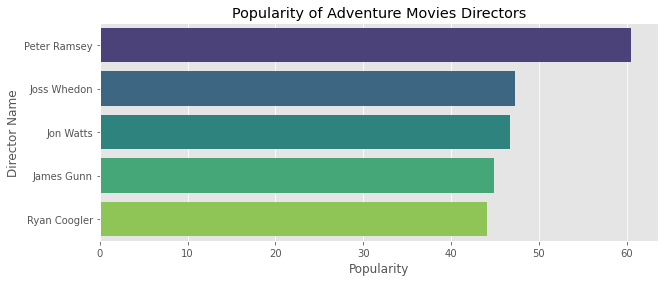

In [1325]:
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='primary_name', data=dir_adventure, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.title('Popularity of Adventure Movies Directors')
plt.show()

In [1331]:
dir_action = dir_action.groupby('primary_name')['popularity'].median().reset_index()
dir_action = dir_action.sort_values(by='popularity', ascending=False)
dir_action = dir_action.head(5)

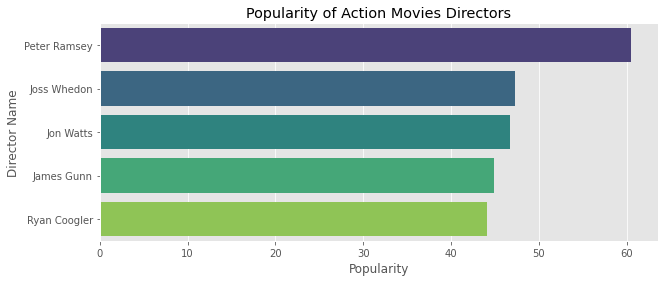

In [1326]:
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='primary_name', data=dir_action, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.title('Popularity of Action Movies Directors')
plt.show()

In [1329]:
dir_fantasy = dir_fantasy.groupby('primary_name')['popularity'].median().reset_index()
dir_fantasy = dir_fantasy.sort_values(by='popularity', ascending=False)
dir_fantasy = dir_fantasy.head(5)

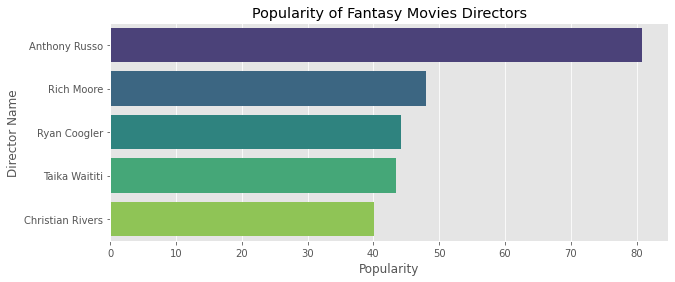

In [1327]:
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='primary_name', data=dir_fantasy, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.title('Popularity of Fantasy Movies Directors')
plt.show()

## Conclusions

* Adventure - Peter Ramsey, Joss Whedon, Jon Watts. November, December
* Action - Peter Ramsey, Joss Whedon, Jon Watts. July, December
* Fantasy - Anthony Russo, Rich Moore, Ryan Coogler. Novermber, December

## Next Steps

For further steps we recommend expanding analysis into several directions:

* Explore data on profits and movie perfomance on streaming services.

* Add budgets spent on marketing. ["Many people get confused when they hear that a movie with a production budget of 100 million grosses 150 million worldwide and loses money. But the brutal fact is that movies get sunk by the massive costs of marketing and distribution all the time."](https://www.studiobinder.com/blog/production-budget/)
* Explore global trends in genres